# Kriging with kt3d raw

In [1]:
import pygslib as gslib 
import numpy as np
import matplotlib.pyplot as plt 

#make the plots inline
%matplotlib inline  

Calculating some parameters
-------------------------------

In [2]:
xdb = [0 , 0, 1, 1]
ydb = [1 , 0, 1, 0]
zdb = [0 , 0, 0, 0]
it =  [3, 2]
c0 =  [0.1]
cc =  [0.4, 0.5]
aa =  [8, 26]
aa1 =  [8, 26]
aa2 =  [8, 16]
ang1 = [0, 0]
ang2 = [0, 0]
ang3 = [0, 0]

parameters_blk = { 
                'xdb'  :  xdb,  # X coordinates of discretazation points
                'ydb'  :  ydb,  # Y coordinates of discretazation points
                'zdb'  :  zdb,  # Z coordinates of discretazation points
                'it'   :  it,   # structure type,  array('i') with bounds (ivarg)        
                'c0'   :  c0,   # nugget,  array('f') with bounds (ivarg)        
                'cc'   :  cc,   # variance, array('f') with bounds (nvarg*nst[0])
                'aa'   :  aa,   # parameter a (or range), array('f') with bounds (nst)
                'aa1'  :  aa1,   # parameter a (or range), array('f') with bounds (nst)
                'aa2'  :  aa2,    # parameter a (or range), array('f') with bounds (nst)
                'ang1'   : ang1,   # input rank-1 array('d') with bounds (nst)
                'ang2'   : ang2,    # input rank-1 array('d') with bounds (nst)
                'ang3'   : ang3}     # input rank-1 array('d') with bounds (nst)

In [3]:
cbb=gslib.block_covariance(parameters_blk)

print 'cbb = ', cbb

cbb =  0.803182760643


Note that the block is defined by discretization points, you can use this function to:
  *  find the covariance of a given block size with regular discretization
  *  find the covariance of a given block size with random discretization
  *  find the covariance of a given polygon defined with discretization points
  
  
**Defining the data and parameters**

In [4]:
xa = [- 3., -4., 2., 2.5]
ya = [  4., -2., 5., 2.5]
za = [0., 0., 0., 0.]
vra = [10., 20., 4.5, 30.]  
vea = [ 11.,18 , 4.0, 29.]
na= len(xa)

radius = np.max(xa) -np.min(xa)
ktype =  1
skmean = 0
idrif = [ 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

UNEST = np.nan

extest = 1


mdt, kneq, error = gslib.kt3d_getmatrix_size(ktype,idrif,na)

print error


0


## Run the estimate

In [5]:
parameters_kt3d = { 
                    'xa'      :  xa,    # data x coordinates, array('f') with bounds (na), na is number of data points
                    'ya'      :  ya,    # data y coordinates, array('f') with bounds (na)
                    'za'      :  za,    # data z coordinates, array('f') with bounds (na)
                    'vra'     :  vra,    # variable, array('f') with bounds (na)
                    'vea'     :  vea,    # external drift, array('f') with bounds (na)
                    'xdb'     :  xdb,        # discretization points x coordinates, array('f') with bounds (ndb), ndb is number of discretization points
                    'ydb'     :  ydb,        # discretization points y coordinates, array('f') with bounds (ndb)
                    'zdb'     :  zdb,        # discretization points z coordinates, array('f') with bounds (ndb)
                    'extest'  :  extest,          # external drift at target block, 'f' 
                    'cbb'     :  cbb,          # block covariance , 'f'. Use block_covariance(parameters) to calculate its value
                    'radius'  :  radius,          # search radius, 'f'. Only used to rescale some values
                    'c0'      :  c0,      # nugget,  array('f') with bounds (1)  
                    'it'      :  it,      # structure type,  array('i') with bounds (nst)          
                    'cc'      :  cc, # variance, array('f') with bounds (nst)
                    'aa'      :  aa,     # parameter a (or range mayor), array('f') with bounds (nst)
                    'aa1'     :  aa1,     # parameter a1 (or range semimayor), array('f') with bounds (nst)
                    'aa2'     :  aa2,     # parameter a2 (or range minor), array('f') with bounds (nst)
                    'ang1'    :  ang1,     # rotation angle 1, array('f') with bounds (nst)
                    'ang2'    :  ang2,     # rotation angle 2, array('f') with bounds (nst)
                    'ang3'    :  ang3,     # rotation angle 3, array('f') with bounds (nst)
                    'ktype'   :  ktype,           # kriging type, 'i' (-0=SK,1=OK,2=non-st SK,3=exdrift)
                    'skmean'  :  skmean,          # mean for simple kriging, 'f'
                    'unest'   :  UNEST,    # value for unestimated, 'f'
                    'idrift'   :  idrif,    # drift terms,  array('i') with bounds (9)     
                                                      # the following drift terms are used
                                                      # x,y,z,xx,yy,zz,xy,xz,zy  
                    'kneq'    :  kneq}                   # number of kriging equations, 'f'

est,estv,estt,estvt,w,wt,error,kmatrix,kvector,ksolution = gslib.kt3d(parameters_kt3d)

print 'error : ', error
print 'est   : ', est 
print 'estv  : ', estv
print 'estt  : ', estt
print 'estvt : ', estvt
print 'w     : ', w
print 'wt    : ', wt
print 'kmatrix   : \n',  kmatrix
print 'kvector   : ', kvector
print 'ksolution : ', ksolution

error :  0
est   :  21.3282750547
estv  :  0.5379128165
estt  :  16.1484274417
estvt :  1.26028221846
w     :  [ 0.21065906  0.24796332  0.07760435  0.46377328]
wt    :  [ 0.26151582  0.31218043  0.21566477  0.21063898]
kmatrix   : 
[[ 1.          0.25003169  0.28795346  0.2631384   1.        ]
 [ 0.25003169  1.          0.17257457  0.20088169  1.        ]
 [ 0.28795346  0.17257457  1.          0.53293025  1.        ]
 [ 0.2631384   0.20088169  0.53293025  1.          1.        ]
 [ 1.          1.          1.          1.          0.        ]]
kvector   :  [[ 0.29711138  0.28726149  0.30828597  0.4904454   1.        ]]
ksolution :  [[ 0.21065906  0.24796332  0.07760435  0.46377328 -0.11992936]]


/home/adrian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


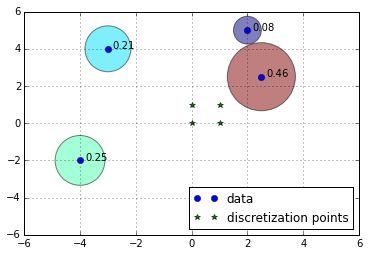

In [6]:
fig, ax1 = plt.subplots()
ax1.scatter(xa, ya,  s=w*10000, c=w, alpha=0.5) # the size is proportional to weight
ax1.plot(xa, ya, 'o', label = 'data')
ax1.plot(xdb, ydb, '*',  label = 'discretization points')
ax1.legend(loc=4)
ax1.grid(True)
ax1.set_xlim([-6, 6])
ax1.set_ylim([-6, 6])

for i,k in enumerate(w):   
    ax1.text(xa[i]+0.2, ya[i], str(np.round(k,2)))

In [7]:
# Testing different parameters?

ktype = 3 #kriging with external drift
mdt, kneq, error = gslib.kt3d_getmatrix_size(ktype,idrif,na)
parameters_kt3d['ktype']=ktype
parameters_kt3d['kneq']=kneq
est,estv,estt,estvt,w,wt,error,kmatrix,kvector,ksolution = gslib.kt3d(parameters_kt3d)

print 'error : ', error
print 'est   : ', est 
print 'estv  : ', estv
print 'estt  : ', estt
print 'estvt : ', estvt
print 'w     : ', w
print 'wt    : ', wt
print 'kmatrix   : \n',  kmatrix
print 'kvector   : ', kvector
print 'ksolution : ', ksolution

error :  0
est   :  1.07038143277
estv  :  1.08654081221
estt  :  1.15013071895
estvt :  1.56100984104
w     :  [ 0.35568992  0.17517432  0.78682656 -0.3176908 ]
wt    :  [ 0.36889204  0.25828978  0.74075023 -0.36793205]
kmatrix   : 
[[  1.           0.25003169   0.28795346   0.2631384    1.          11.        ]
 [  0.25003169   1.           0.17257457   0.20088169   1.          18.        ]
 [  0.28795346   0.17257457   1.           0.53293025   1.           4.        ]
 [  0.2631384    0.20088169   0.53293025   1.           1.          29.        ]
 [  1.           1.           1.           1.           0.           0.        ]
 [ 11.          18.           4.          29.           0.           0.        ]]
kvector   :  [[ 0.29711138  0.28726149  0.30828597  0.4904454   1.          1.        ]]
ksolution :  [[ 0.35568992  0.17517432  0.78682656 -0.3176908  -0.55419255  0.02807655]]


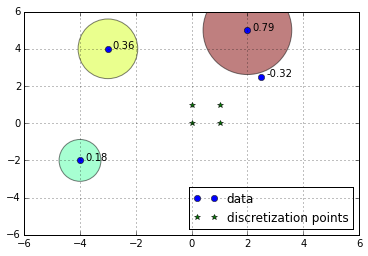

In [8]:
fig, ax1 = plt.subplots()
ax1.scatter(xa, ya,  s=w*10000, c=w, alpha=0.5) # the size is proportional to weight

ax1.plot(xa, ya, 'o', label = 'data')
ax1.plot(xdb, ydb, '*',  label = 'discretization points')
ax1.legend(loc=4)
ax1.grid(True)
ax1.set_xlim([-6, 6])
ax1.set_ylim([-6, 6])

for i,k in enumerate(w):   
    ax1.text(xa[i]+0.2, ya[i], str(np.round(k,2)))

In [9]:
# Testing not returning kriging matrix making kneq=0 fail, use arbitrary number instead (1 in the example below)
# TODO: fix this

ktype = 3 #kriging with external drift
mdt, kneq, error = gslib.kt3d_getmatrix_size(ktype,idrif,na)
parameters_kt3d['ktype']=ktype
parameters_kt3d['kneq']=1
est,estv,estt,estvt,w,wt,error,kmatrix,kvector,ksolution = gslib.kt3d(parameters_kt3d)

print 'error : ', error
print 'est   : ', est 
print 'estv  : ', estv
print 'estt  : ', estt
print 'estvt : ', estvt
print 'w     : ', w
print 'wt    : ', wt
print 'kmatrix   : \n',  kmatrix
print 'kvector   : ', kvector
print 'ksolution : ', ksolution

error :  10
est   :  1.07038143277
estv  :  1.08654081221
estt  :  1.15013071895
estvt :  1.56100984104
w     :  [ 0.35568992  0.17517432  0.78682656 -0.3176908 ]
wt    :  [ 0.36889204  0.25828978  0.74075023 -0.36793205]
kmatrix   : 
[[ 0.]]
kvector   :  [[ 0.]]
ksolution :  [[ 0.]]


/home/adrian/bitbucket/public/pygslib/pygslib/__init__.py:945: UserWarning: Error > 0, check your parameters
  warnings.warn('Error > 0, check your parameters')
